# Выделение признаков

In [2]:
# !pip install --user tsfresh

     |████████████████████████████████| 102kB 1.5MB/s ta 0:00:01
     |████████████████████████████████| 675kB 5.7MB/s eta 0:00:01
     |████████████████████████████████| 122kB 11.7MB/s eta 0:00:01    |████████████████████▎           | 71kB 11.1MB/s eta 0:00:01
     |████████████████████████████████| 1.1MB 9.7MB/s eta 0:00:01
     |████████████████████████████████| 931kB 10.6MB/s eta 0:00:01
     |████████████████████████████████| 3.4MB 8.1MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 10.0MB/s eta 0:00:01
     |████████████████████████████████| 122kB 10.1MB/s eta 0:00:01
     |████████████████████████████████| 112kB 13.0MB/s eta 0:00:01
     |████████████████████████████████| 25.3MB 6.0MB/s eta 0:00:011    |████████████▍                   | 9.8MB 10.1MB/s eta 0:00:02     |█████████████▏                  | 10.4MB 10.1MB/s eta 0:00:02     |███████████████████▏            | 15.2MB 12.8MB/s eta 0:00:01     |███████████████████████████████ | 24.5MB 6.0MB/s eta 0:00:01


  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7668 sha256=3bb291bf89d79363f9eb5f48c257175e16f7822bb26e284806690f0d6eaa9c22
  Stored in directory: /notebooks/home/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built contextvars
ERROR: spyder 3.3.6 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 3.3.6 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
ERROR: stumpy 1.9.2 has requirement scipy>=1.5, but you'll have scipy 1.3.1 which is incompatible.
ERROR: matrixprofile 1.1.10 has requirement scipy<2.0.0,>=1.3.2, but you'll have scipy 1.3.1 which is incompatible.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
# !pip install --user --upgrade scipy 

  Using cached https://files.pythonhosted.org/packages/c8/89/63171228d5ced148f5ced50305c89e8576ffc695a90b58fe5bb602b910c2/scipy-1.5.4-cp36-cp36m-manylinux1_x86_64.whl


In [20]:
# !pip install --user PyQt5

ERROR: Could not find a version that satisfies the requirement 5.12 (from versions: none)
ERROR: No matching distribution found for 5.12


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# выделение признаков при помощи TSFresh
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, EfficientFCParameters, MinimalFCParameters

# Создаём временные ряды и визуализируем их

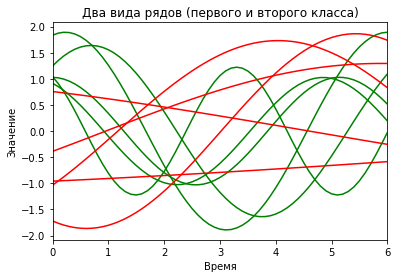

data.shape = (122000, 4)
data.id.nunique() = 2000


,t,y,class,id
0,0.0,3.245872,1,0
1,0.1,3.348260,1,0
2,0.2,3.436487,1,0


In [2]:
N = 1000 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints) 

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    A = 1 + random.random()        ## амплитуда
    w = 1 + random.random()        ## частота
    ph = np.pi * random.random()   ## фаза
    
    
    df['t']  = t                   ## ось времени
    df['y']  = A*np.sin(t*w + ph)  ## значения временного ряда
    df['class'] = 1                ## класс временного ряда 
    df['id'] = i                   ## номер временного ряда
    
    data = data.append(df)         ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g') 
    
## генерируем семплы второго класса    
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза
    
    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['class'] = 0                  ## класс временного ряда 
    df['id'] = i                     ## номер временного ряда
    
    data = data.append(df)           ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r') 
    
## cдвигаем все значения вверх, чтобы все значения были положительными    
data['y'] = data.y + np.abs(data.y.min())
    
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

# Выделение признаков при помощи TSFresh
http://tsfresh.readthedocs.io/en/latest/

In [10]:
def featuresTSFresh(data):    

    ## список фич (см. документацию по TSFresh: https://media.readthedocs.org/pdf/tsfresh/latest/tsfresh.pdf)
    extraction_settings = \
    {
        ## признак: параметр
        "maximum": None,
        "mean": None,
        "minimum": None,
        "median": None,
        "standard_deviation": None,
        "binned_entropy": [{"max_bins" : 10}],
        "count_above_mean": None,
        "count_below_mean": None,
        "first_location_of_maximum": None,
        "first_location_of_minimum": None,
        "mean_change": None,
        "sum_values": None,
        "kurtosis": None,
        "skewness": None,
        "abs_energy": None        
    }

    ## извлечение фич из данных    
    featuresDF = extract_features(
        data, 
        column_id='id',  ## номер временного ряда
        column_sort='t', ## ось времени
        default_fc_parameters=extraction_settings, ## список фич, которые хотим извлечь
        impute_function=impute                     ## заменить все inf и NaN
    )
    
    ## вытаскиваем колонку id из индекса 
    featuresDF = featuresDF.reset_index()

    return featuresDF

## убираем колонку class из данных (мы не хотим из неё извлекать фичи)
features = featuresTSFresh(data.drop('class', axis=1))

## помечаем ряды (добавляем обратно первый и второй класс)
features['label'] = 0
features['label'].iloc[N:] = 1

print('data.shape =', data.shape)
print('features.shape =', features.shape)
features.head(3)

Feature Extraction: 100%|██████████| 5/5 [00:02<00:00,  2.43it/s]

data.shape = (122000, 4)
features.shape = (2000, 17)



/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,index,y__maximum,y__mean,y__minimum,y__median,y__standard_deviation,y__binned_entropy__max_bins_10,y__count_above_mean,y__count_below_mean,y__first_location_of_maximum,y__first_location_of_minimum,y__mean_change,y__sum_values,y__kurtosis,y__skewness,y__abs_energy,label
0,0,3.638476,1.993396,0.361503,2.021114,1.159167,2.177507,31.0,30.0,0.114754,0.622951,-0.002539,121.597163,-1.522487,0.010053,324.355057,0
1,1,3.222351,1.831576,0.776047,1.756307,0.828757,2.185494,27.0,34.0,0.540984,0.836066,-0.017766,111.726131,-1.365224,0.291575,246.532037,0
2,2,3.891279,2.096981,0.107249,2.144667,1.367380,2.146856,31.0,30.0,0.983607,0.508197,0.000943,127.915835,-1.548907,-0.083391,382.290408,0


# Машинное обучение

trainSet.shape = (1200, 17)
testSet.shape  = (800, 17)

Value counts train:
 1    603
0    597
Name: label, dtype: int64

Value counts test:
 0    403
1    397
Name: label, dtype: int64


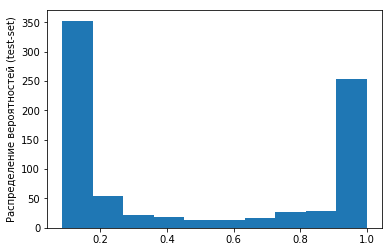

                          features   importances
12                     y__kurtosis  5.348543e-01
9     y__first_location_of_minimum  2.764692e-01
5   y__binned_entropy__max_bins_10  9.558191e-02
4            y__standard_deviation  3.486869e-02
8     y__first_location_of_maximum  2.662037e-02
10                  y__mean_change  8.148802e-03
1                          y__mean  8.034701e-03
11                   y__sum_values  6.024088e-03
3                        y__median  4.364598e-03
14                   y__abs_energy  2.369408e-03
13                     y__skewness  2.036991e-03
0                       y__maximum  2.565418e-04
7              y__count_below_mean  2.391088e-04
2                       y__minimum  1.312449e-04
6              y__count_above_mean  1.015743e-17

   Pos  Neg
0  394    9
1   63  334

AUC = 0.960  Точность = 0.910



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


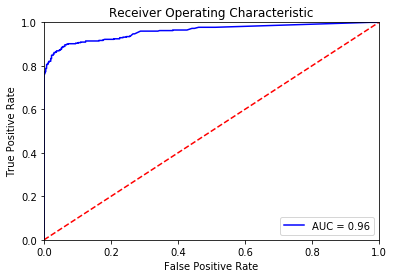

In [12]:
## разбиваем выделенные фичи на тренировочный и тестовый наборы 
trainSet, testSet = train_test_split(features, test_size=0.4, random_state=42) 

## выводим статистику по нашим наборам
print('trainSet.shape =', trainSet.shape)
print('testSet.shape  =', testSet.shape)
print()
print('Value counts train:\n', trainSet.label.value_counts())
print()
print('Value counts test:\n', testSet.label.value_counts())

## лист фич
featureList = trainSet.drop(['index', 'label'], axis=1).columns

## параметры классификатора
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'max_features' : 1.0, 'class_weight' : 'balanced',
         'random_state': 42}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet['label'])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1]  ## вероятности

## визуализируем вероятности для предсказаний
import matplotlib.pyplot as plt
plt.hist(y_pred_proba)
plt.ylabel('Распределение вероятностей (test-set)')
plt.show()



from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

## создадим для удобства дейтафрейм с результатами
res = testSet
res['pred'] = y_pred 
res['pred_proba'] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt['features'] = featureList
ftmprt['importances'] = clf.feature_importances_
ftmprt = ftmprt.sort_values('importances', ascending=False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

## считаем матрицу ошибок
CM = confusion_matrix(res['label'], res['pred'])
CM_DF = pd.DataFrame(data=CM, columns = ['Pos', 'Neg'])
print(CM_DF)

# ROC-AUC 
FPR, TPR, thresholds = roc_curve(res['label'], res['pred_proba'])
roc_auc = auc(FPR, TPR)
acc = res[res['pred'] == res['label']].shape[0] / res.shape[0] ## точность
print(f"\nAUC = {roc_auc:.3f}  Точность = {acc:.3f}\n")

# ROC-кривая
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, 'b', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Задания

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, EfficientFCParameters, MinimalFCParameters

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

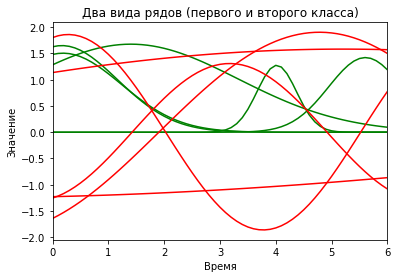

data.shape = (12200, 4)
data.id.nunique() = 200


,t,y,label,id
0,0.0,1.957849,1,0
1,0.1,1.957849,1,0
2,0.2,1.957849,1,0


In [51]:
N = 100 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints) 

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    t0 = 2*np.pi*random.random()
    a1 = 5*random.random()
    A = 1 + random.random()        
    
    df['t']  = t                   ## ось времени
    df['y']  = A*np.exp(-(df.t-t0)**2/2/a1)  ## значения временного ряда
    df['label'] = 1                ## класс временного ряда 
    df['id'] = i                   ## номер временного ряда
    
    data = data.append(df)         ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g') 
    
## генерируем семплы второго класса    
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза
    
    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['label'] = 0                  ## класс временного ряда 
    df['id'] = i                     ## номер временного ряда
    
    data = data.append(df)           ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r') 
    
## cдвигаем все значения вверх, чтобы все значения были положительными    
data['y'] = data.y + np.abs(data.y.min())
    
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

Задание 8.19.1

Посчитайте максимальное, минимальное, среднее и медианное значение для каждого временного ряда. Хинт: используйте функцию pandas.DataFrame.groupby(). Укажите эти значения округлённые до второго знака после запятой для временного ряда с id = 3.

Укажите максимальное значение:

In [33]:
def gb_max(val):
    return round(np.max(val), 2)

def gb_min(val):
    return round(np.min(val), 2)

def gb_mean(val):
    return round(np.mean(val), 2)

def gb_median(val):
    return round(np.median(val), 2)

df = data.groupby('id')['y'].agg([gb_max, gb_min, gb_mean, gb_median])
df.head(5)

,gb_max,gb_min,gb_mean,gb_median
id,,,,
0,3.23,1.96,2.14,1.96
1,3.63,2.05,2.97,3.14
2,3.38,1.96,2.25,1.96
3,3.46,1.96,2.34,2.00
4,3.61,1.96,2.35,1.99


In [34]:
df.loc[3]

gb_max       3.46
gb_min       1.96
gb_mean      2.34
gb_median    2.00
Name: 3, dtype: float64

Задание 8.19.2

Создайте дейтафрейм features с посчитанными фичами (минимальное, среднее и медианное значение) для каждого из рядов, содержащий, помимо фич, колонки:

'id', 'label'.

In [46]:
features = data.groupby('id')['y'].agg([gb_min, gb_mean, gb_median])

features.loc[:, 'id'] = features.index

## помечаем ряды (добавляем обратно первый и второй класс)
features.loc[:, 'label'] = 0
features.loc[N:, 'label'] = 1

features.head(3)

,gb_min,gb_mean,gb_median,id,label
id,,,,,
0,1.96,2.14,1.96,0,0
1,2.05,2.97,3.14,1,0
2,1.96,2.25,1.96,2,0


Запустите алгоритм в следующей ячейке. Укажите количество false negatives.

trainSet.shape = (120, 5)
testSet.shape  = (80, 5)

Value counts train:
 1    60
0    60
Name: label, dtype: int64

Value counts test:
 1    40
0    40
Name: label, dtype: int64


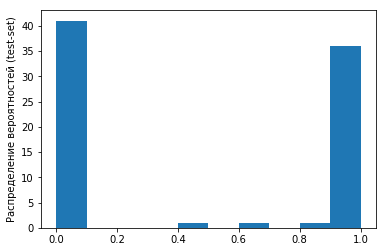

    features  importances
0     gb_min     0.990347
2  gb_median     0.007366
1    gb_mean     0.002287

   Pos  Neg
0   40    0
1    2   38

AUC = 0.987  Точность = 0.975



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


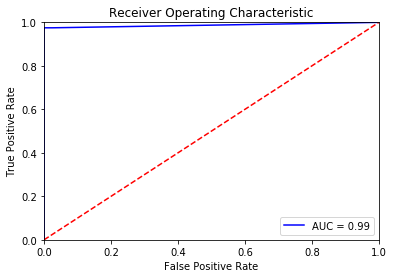

In [49]:
trainSet, testSet = train_test_split(features, test_size=0.4, random_state=42) 

## выводим статистику по нашим наборам
print('trainSet.shape =', trainSet.shape)
print('testSet.shape  =', testSet.shape)
print()
print('Value counts train:\n', trainSet.label.value_counts())
print()
print('Value counts test:\n', testSet.label.value_counts())

## лист фич
featureList = trainSet.drop(['id', 'label'], axis=1).columns

## параметры классификатора
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'max_features' : 1.0, 'class_weight' : 'balanced',
         'random_state': 42}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet['label'])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1]  ## вероятности

## визуализируем вероятности для предсказаний
plt.hist(y_pred_proba)
plt.ylabel('Распределение вероятностей (test-set)')
plt.show()
## создадим для удобства дейтафрейм с результатами
res = testSet
res['pred'] = y_pred 
res['pred_proba'] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt['features'] = featureList
ftmprt['importances'] = clf.feature_importances_
ftmprt = ftmprt.sort_values('importances', ascending=
False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

## считаем матрицу ошибок
CM = confusion_matrix(res['label'], res['pred'])
CM_DF = pd.DataFrame(data=CM, columns = ['Pos', 'Neg'])
print(CM_DF)

# ROC-AUC 
FPR, TPR, thresholds = roc_curve(res['label'], res['pred_proba'])
roc_auc = auc(FPR, TPR)
acc = res[res['pred'] == res['label']].shape[0] / res.shape[0] ## точность
print(f"\nAUC = {roc_auc:.3f}  Точность = {acc:.3f}\n")

# ROC-кривая
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, 'b', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc=
'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Задание 8.19.3

Посчитайте те же четыре фичи (max, min, mean, median), а также "count_below_mean" при помощи пакета TSFresh, результат запишите в дейтафрейм features. 

Укажите значение count_below_mean для ряда с id == 4. Ответ округлите до целого числа.

In [56]:
def featuresTSFresh(data):    

    ## список фич (см. документацию по TSFresh: https://media.readthedocs.org/pdf/tsfresh/latest/tsfresh.pdf)
    extraction_settings = {
        ## признак: параметр
        "maximum": None,
        "mean": None,
        "minimum": None,
        "median": None,
        "count_below_mean": None      
    }

    ## извлечение фич из данных    
    featuresDF = extract_features(
        data, 
        column_id='id',  ## номер временного ряда
        column_sort='t', ## ось времени
        default_fc_parameters=extraction_settings, ## список фич, которые хотим извлечь
        impute_function=impute                     ## заменить все inf и NaN
    )
    
    ## вытаскиваем колонку id из индекса 
    featuresDF = featuresDF.reset_index()

    return featuresDF

## убираем колонку class из данных (мы не хотим из неё извлекать фичи)
features = featuresTSFresh(data)

## помечаем ряды (добавляем обратно первый и второй класс)
features.loc[:, 'label'] = 0
features.loc[N:, 'label'] = 1

features.head(3)

Feature Extraction: 100%|██████████| 5/5 [00:00<00:00, 25.55it/s]


,index,y__maximum,y__mean,y__minimum,y__median,y__count_below_mean,label__maximum,label__mean,label__minimum,label__median,label__count_below_mean,label
0,0,3.231294,2.143130,1.957849,1.957977,47.0,1.0,1.0,1.0,1.0,0.0,0
1,1,3.634548,2.972939,2.052910,3.143508,27.0,1.0,1.0,1.0,1.0,0.0,0
2,2,3.379718,2.246776,1.957849,1.958426,45.0,1.0,1.0,1.0,1.0,0.0,0


In [60]:
features.loc[4, 'y__count_below_mean']

42.0